# Project on Daily stock price of Facebook from 31-12-2014 to 05-02-2018

In [1]:
#Hello Everyone
#This is Umang!
#I have two datasets of historical stock data of Microsoft and Facebook 
#I am going to analyse the data and view basic trends using python

In [2]:
#Importing pandas directly was showing error of 'Module not found'
!pip install pandas

In [3]:
!pip install scipy

In [4]:
#Pandas is used for data structure for time series data
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm

In [5]:
#If we want to study just the price of different years by plotting
!pip install matplotlib

In [6]:
import matplotlib. pyplot as plt
%matplotlib inline

# Analyzing Facebook Data

In [7]:
#Importing Facebook data, that we uploaded in our jupiter notebook
fb = pd.read_csv(r"C:\Users\umang\Desktop\facebook.csv")

In [8]:
#To obtain first five rows and check the heads of our data
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume
0,31-12-2014,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,02-01-2015,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,05-01-2015,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,06-01-2015,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,07-01-2015,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [9]:
#This data shows Opening price, closing price, highest price, lowest price, Adjust close with is Stock closing price, and volume
#Lets attract some more basic details of our data in order to study it
fb.shape

(780, 8)

In [10]:
fb.columns

Index(['Date', 'Year', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
fb.describe()

,Year,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,2016.057692,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,0.877916,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,2014.000000,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,2015.000000,25.525000,26.085000,24.845000,25.475000,25.134512,7.215200e+06
50%,2016.000000,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,2017.000000,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,2018.000000,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


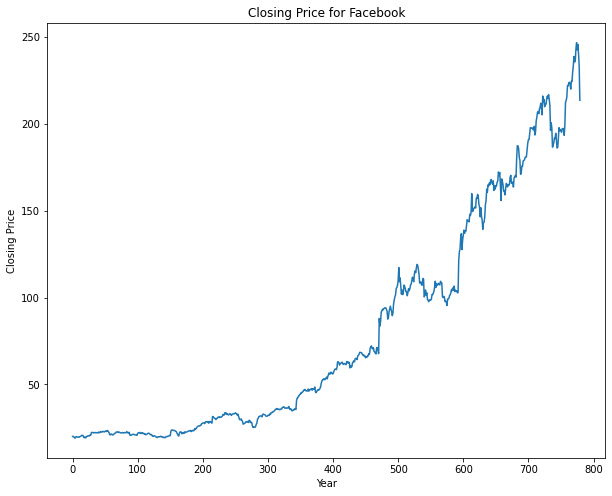

In [12]:
#Plotting the closing price 
plt.figure(figsize=(10,8))
fb['Close'].plot()
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price for Facebook")
plt.show()

In [13]:
#We can notice from the graph that the growth of closing stock price was low till 2016. But it rose speadily after Dec 2016.

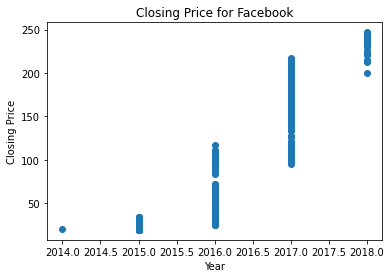

In [14]:
#Plotting year wise scatter plot
plt.scatter(fb['Year'],fb['Close'])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price for Facebook")
plt.show()

In [15]:
fb_2015 = fb.loc[fb.Year==2015]
mean_fb_2015 = fb_2015['Close'].mean()


fb_2016 = fb.loc[fb.Year==2016]
mean_fb_2016 = fb_2016['Close'].mean()

      
fb_2017 = fb.loc[fb.Year==2017]
mean_fb_2017 = fb_2017['Close'].mean()

      
fb_2018 = fb.loc[fb.Year==2018]
mean_fb_2018 = fb_2018['Close'].mean()


In [16]:
X = ["2015","2016","2017","2018"]
Y = [mean_fb_2015, mean_fb_2016, mean_fb_2017, mean_fb_2018]

Text(0.5, 1.0, 'Closing Price for Facebook')

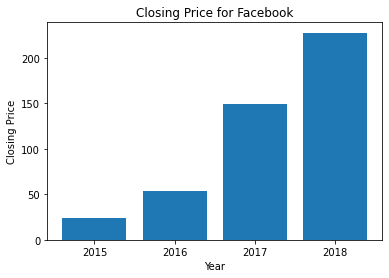

In [17]:
plt.bar(X,Y)
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price for Facebook")

In [18]:
#Changing the date into datetime format
fb['Date'] = pd.to_datetime(fb.Date)
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [19]:
#creating a new column in dataframe for year
fb['Year'] = pd.DatetimeIndex(fb.Date).year
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [20]:
fb['Price1'] = fb['Close'].shift(-1)
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001


In [21]:
#creating new column of price difference (close price of tomorow - close price of today)
fb['PriceDiff']= fb['Price1'] - fb['Close']
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002


In [22]:
#creating a column of daily return
fb['Return'] = fb['PriceDiff']/fb['Close']
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618


In [23]:
#Finding the direction of the price difference
fb['Direction'] = [1 if fb.loc[ei, 'PriceDiff']>0 else -1 for ei in fb.index]
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1


In [24]:
#calculate moving average of close price over three days
fb['Aveerage3']= (fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2))/3
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Aveerage3
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1,NaN
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1,NaN
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1,19.990000
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1,19.703334
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1,19.373334


In [25]:
fb['MA40'] = fb['Close'].rolling(40).mean()
fb['MA200'] = fb['Close'].rolling(200).mean()
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Aveerage3,MA40,MA200
0,2014-12-31,2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,20.129999,0.080000,0.003990,1,NaN,NaN,NaN
1,2015-02-01,2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,19.790001,-0.339998,-0.016890,-1,NaN,NaN,NaN
2,2015-05-01,2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,19.190001,-0.600000,-0.030318,-1,19.990000,NaN,NaN
3,2015-06-01,2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.139999,-0.050002,-0.002606,-1,19.703334,NaN,NaN
4,2015-07-01,2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.860001,0.720002,0.037618,1,19.373334,NaN,NaN


<AxesSubplot:>

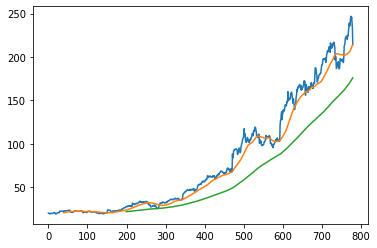

In [26]:
#MA40 is a fast signal for recent changes(short term) and MA200 is a slow signal for long term changes  
#when MA40>MA200 Traders beleive it that stock price will go upwards for a while 
#ie when MA40>MA200 we buy and hold one share
fb['Close'].plot()
fb['MA40'].plot()
fb['MA200'].plot()

In [27]:
fb['MA40']= fb['Close'].rolling(40).mean()
fb['MA200']= fb['Close'].rolling(200).mean()
fb = fb.dropna()

In [28]:
#creating a column of shares
fb['Shares']=[1 if fb.loc[ei, 'MA40']> fb.loc[ei, 'MA200'] else 0 for ei in fb.index]
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Aveerage3,MA40,MA200,Shares
199,2015-10-15,2015,27.410000,27.990000,27.129999,27.430000,26.961004,13151200,27.860001,0.430001,0.015676,1,27.063334,23.54000,21.77235,1
200,2015-10-16,2015,27.520000,28.120001,27.450001,27.860001,27.383654,11209900,27.809999,-0.050002,-0.001795,-1,27.550001,23.68250,21.81140,1
201,2015-10-19,2015,27.950001,28.080000,27.490000,27.809999,27.334509,7367800,27.770000,-0.039999,-0.001438,-1,27.700000,23.84100,21.84980,1
202,2015-10-20,2015,27.690001,27.900000,27.480000,27.770000,27.295193,6610700,27.410000,-0.360000,-0.012964,-1,27.813333,24.01750,21.88970,1
203,2015-10-21,2015,27.940001,28.110001,27.360001,27.410000,26.941347,9657000,28.400000,0.990000,0.036118,1,27.663333,24.19575,21.93080,1


In [29]:
#we already have a new column of Price1 ie close price for tomorrow
#Now we create a column for profit
fb['Profit']= [fb.loc[ei,'Price1']-fb.loc[ei,'Close']
              if fb.loc[ei,'Shares']==1
              else 0 for ei in fb.index]
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Aveerage3,MA40,MA200,Shares,Profit
199,2015-10-15,2015,27.410000,27.990000,27.129999,27.430000,26.961004,13151200,27.860001,0.430001,0.015676,1,27.063334,23.54000,21.77235,1,0.430001
200,2015-10-16,2015,27.520000,28.120001,27.450001,27.860001,27.383654,11209900,27.809999,-0.050002,-0.001795,-1,27.550001,23.68250,21.81140,1,-0.050002
201,2015-10-19,2015,27.950001,28.080000,27.490000,27.809999,27.334509,7367800,27.770000,-0.039999,-0.001438,-1,27.700000,23.84100,21.84980,1,-0.039999
202,2015-10-20,2015,27.690001,27.900000,27.480000,27.770000,27.295193,6610700,27.410000,-0.360000,-0.012964,-1,27.813333,24.01750,21.88970,1,-0.360000
203,2015-10-21,2015,27.940001,28.110001,27.360001,27.410000,26.941347,9657000,28.400000,0.990000,0.036118,1,27.663333,24.19575,21.93080,1,0.990000


<AxesSubplot:>

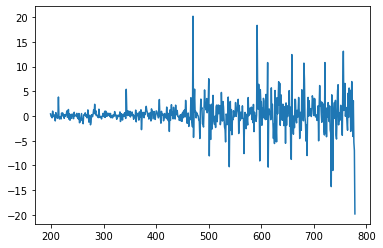

In [30]:
#Plotting the proft
fb['Profit'].plot()

<AxesSubplot:>

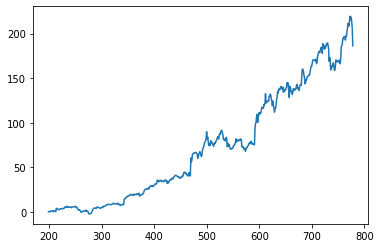

In [31]:
#Finding the cumulative profit or wealth
fb['Wealth']= fb['Profit'].cumsum()
fb['Wealth'].plot()

In [32]:
print("Total money win is ",fb.loc[fb.index[-2],'Wealth'])

Total money win is  206.090004


In [33]:
print("Total money spent is ",fb.loc[fb.index[0],'Close'])

Total money spent is  27.43


# Estimating the Average stock return with 90% Confidence Interval
#We use Log return 

In [34]:
fb['Log_Return'] = np.log(fb['Close'].shift(-1)) - np.log(fb['Close'])
fb.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Return,Direction,Aveerage3,MA40,MA200,Shares,Profit,Wealth,Log_Return
199,2015-10-15,2015,27.410000,27.990000,27.129999,27.430000,26.961004,13151200,27.860001,0.430001,0.015676,1,27.063334,23.54000,21.77235,1,0.430001,0.430001,0.015555
200,2015-10-16,2015,27.520000,28.120001,27.450001,27.860001,27.383654,11209900,27.809999,-0.050002,-0.001795,-1,27.550001,23.68250,21.81140,1,-0.050002,0.379999,-0.001796
201,2015-10-19,2015,27.950001,28.080000,27.490000,27.809999,27.334509,7367800,27.770000,-0.039999,-0.001438,-1,27.700000,23.84100,21.84980,1,-0.039999,0.340000,-0.001439
202,2015-10-20,2015,27.690001,27.900000,27.480000,27.770000,27.295193,6610700,27.410000,-0.360000,-0.012964,-1,27.813333,24.01750,21.88970,1,-0.360000,-0.020000,-0.013048
203,2015-10-21,2015,27.940001,28.110001,27.360001,27.410000,26.941347,9657000,28.400000,0.990000,0.036118,1,27.663333,24.19575,21.93080,1,0.990000,0.970000,0.035481


In [40]:
#Getting Sample size, Sample Mean, Sample standard deviation
sample_size = fb['Log_Return'].shape[0]
sample_mean = fb['Log_Return'].mean()
sample_std = fb['Log_Return'].std(ddof=1) / sample_size**5

print(sample_size)
print(sample_mean)
print(sample_std)

580
0.003698843590199483
3.977703036945102e-16


In [41]:
#90% confidence interval tells that there is 90% chance that average stock return lies between interval left and interval right
print("90% confidence interval is ", (interval_left, interval_right))

90% confidence interval is  (None, None)
